# Heart Disease Classification

## Business Goal

The Framingham Heart Study (https://www.framinghamheartstudy.org/fhs-about/) is a long term, ongoing study on cardiovascular disease (CVD). Started in 1948, the study looked at numerous factors such as age, gender, cholesterol levels, etc, and would eventually lead to the identification of several CVD risk factors.  

We'll be working with the largest hospital in Massachusetts (The Massachusetts General Hospital). Using various classification algorithms, we'll determine which algorithm provides the most accurate predictions for whether a patient is at risk in 10 years for CVD. This will in turn help the hospital create a treatment/preventative plan for at-risk patients early on, and hopefully prevent CVD from developing.    

### Preprocessing Our Data ###

In [1]:
import pandas as pd

#Let's look at our data
df = pd.read_csv("Framingham.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


In [2]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Let's convert BPMeds from a float to an int
df["BPMeds"] = df["BPMeds"].astype(int)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   int32  
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(7), int32(1), int64(8)
memory usage: 500.6 KB


In [5]:
##Let's check for null values

df.isnull().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
#Let's check for duplicates
df.drop_duplicates(inplace = True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


### Splitting The Data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("TenYearCHD", axis = 1)
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

#Let's scale our data
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [8]:
#Let's take a look at our value counts for our target "TenYearCHD"
df["TenYearCHD"].value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

**It looks like our data is imbalanced, so let's use SMOTE to resample.**

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

## The Algorithms

Using three different classification algorithms, we'll look at how well our models can predict whether a patient is at risk (in  10 years) for CVD. We'll use logistic regression as a base model, then use a Decision Tree algorithm, then finally build upon our Decision Tree with a Random Forest algorithms.

### Logistic Regression

In [10]:
#Let's build a logistic regression model
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(solver = "saga")

#Fit our model and predict
baseline_model.fit(X_train, y_train)
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2628
           1       0.68      0.69      0.69      2628

    accuracy                           0.68      5256
   macro avg       0.68      0.68      0.68      5256
weighted avg       0.68      0.68      0.68      5256



In [12]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       877
           1       0.26      0.68      0.38       157

    accuracy                           0.66      1034
   macro avg       0.59      0.67      0.58      1034
weighted avg       0.82      0.66      0.71      1034



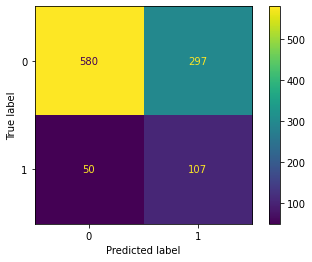

In [13]:
#Let's create a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(baseline_model, X_test, y_test);

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy")

#Fit our model and predict
dtc.fit(X_train, y_train)
dtc_train_pred = dtc.predict(X_train)
dtc_test_pred = dtc.predict(X_test)


In [15]:
print(classification_report(y_train, dtc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00      2628

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256



In [16]:
print(classification_report(y_test, dtc_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       877
           1       0.22      0.39      0.28       157

    accuracy                           0.69      1034
   macro avg       0.55      0.57      0.54      1034
weighted avg       0.77      0.69      0.73      1034



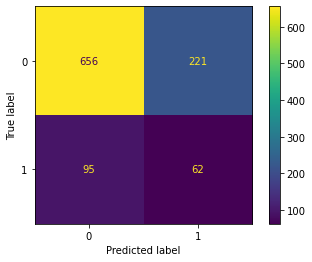

In [17]:
conf_matrix = confusion_matrix(y_test, dtc_test_pred)
plot_confusion_matrix(dtc, X_test, y_test);

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)


In [19]:
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00      2628

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256



In [20]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       877
           1       0.29      0.27      0.28       157

    accuracy                           0.79      1034
   macro avg       0.58      0.58      0.58      1034
weighted avg       0.78      0.79      0.78      1034



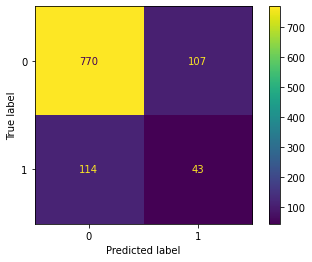

In [21]:
conf_matrix = confusion_matrix(y_test, rf_test_pred)
plot_confusion_matrix(rf, X_test, y_test);

## Improving The Models

### 1) Decision Tree

We'll see how manipulating the **max_depth** and **min_samples_split** hyperparameters in our decision tree model will affect our evaluation metrics.



### max_depth ###

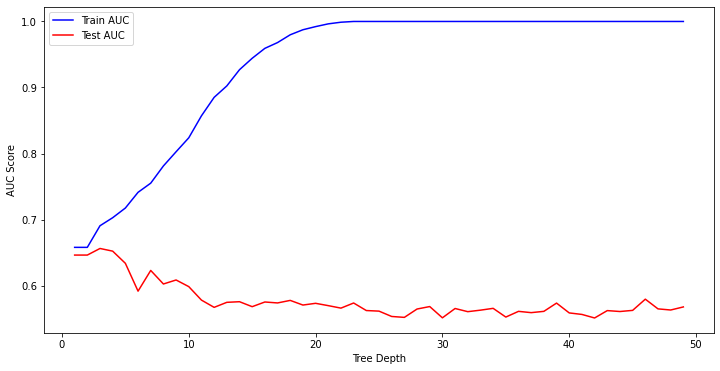

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Let's plot our ROC curve

max_depths = list(range(1,50))
train_results = []
test_results = []

for depth in max_depths:
    dtc2 = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize = (12,6))
plt.plot(max_depths,train_results, "b", label = "Train AUC");
plt.plot(max_depths, test_results, "r", label = "Test AUC");
plt.ylabel("AUC Score");
plt.xlabel("Tree Depth");
plt.legend();

### min_samples_split ###

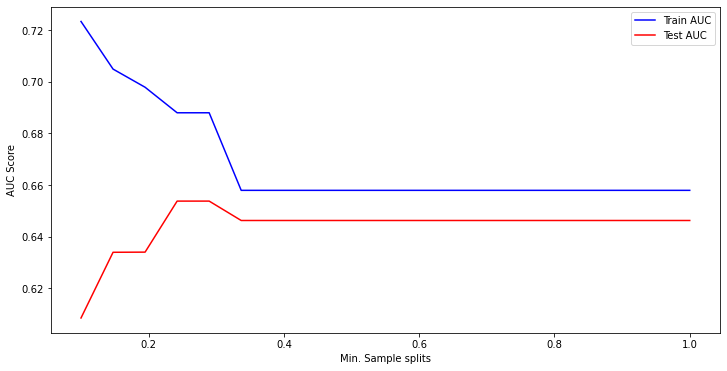

In [23]:
import numpy as np
min_samples_splits = np.linspace(0.1, 1.0, 20)
train_results = []
test_results = []
for min_samples in min_samples_splits:
    dtc2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples)
    dtc2.fit(X_train, y_train)
    dtc_pred2 = dtc2.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, dtc_pred2)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_dtc_pred = dtc2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_dtc_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6));
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC');
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC');
plt.xlabel('Min. Sample splits');
plt.ylabel("AUC Score")
plt.legend();

In [24]:
from sklearn.model_selection import GridSearchCV

dtc3 = DecisionTreeClassifier()
#dtc3.fit(X_train, y_train)
#dtc3_pred = dtc3.predict(X_test)


param_grid = {
    'criterion': ['entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ]
}


gs_tree = GridSearchCV(dtc3, param_grid)
gs_tree.fit(X_train, y_train)
#gs_tree.best_params_
gs_tree_pred = gs_tree.predict(X_test)

In [25]:
print(classification_report(y_test, gs_tree_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       877
           1       0.27      0.61      0.37       157

    accuracy                           0.69      1034
   macro avg       0.59      0.65      0.58      1034
weighted avg       0.81      0.69      0.73      1034



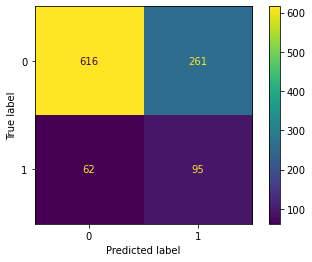

In [26]:
dt_model = gs_tree.best_estimator_
plot_confusion_matrix(dt_model, X_test, y_test);

### 2) Random Forest Classifier

In [27]:
rf2 = RandomForestClassifier()


rand_for_grid = {
    'n_estimators': [100, 150, 200, 250],
    
    'max_depth': [10, 20, 30],
    
    'min_samples_split': [10, 20, 30]
    
    
}

gs_forest = GridSearchCV(rf2, rand_for_grid)
gs_forest.fit(X_train, y_train)

gs_forest.best_params_
#gs_forest_pred = gs_forest.predict(X_test)

{'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 250}

In [28]:
gs_forest_pred = gs_forest.predict(X_test)
print(classification_report(y_test, gs_forest_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       877
           1       0.31      0.35      0.33       157

    accuracy                           0.78      1034
   macro avg       0.59      0.61      0.60      1034
weighted avg       0.79      0.78      0.79      1034



In [29]:
#Let's tune the hyperparamters some more

rf3 = RandomForestClassifier()


rand_for_grid = {
    'n_estimators': [100, 150, 200, 250],
    
    'max_depth': [30, 40, 50],
    
    'min_samples_split': [2, 5, 10]
    
}

gs_forest_tune = GridSearchCV(rf3, rand_for_grid)
gs_forest_tune.fit(X_train, y_train)

gs_forest_tune.best_params_


{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 250}

In [30]:
gs_forest_tune_pred = gs_forest_tune.predict(X_test )
print(classification_report(y_test, gs_forest_tune_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       877
           1       0.32      0.30      0.31       157

    accuracy                           0.80      1034
   macro avg       0.60      0.59      0.60      1034
weighted avg       0.79      0.80      0.79      1034



In [31]:
rf4 = RandomForestClassifier()


rand_for_grid = {
    'n_estimators': [100, 150, 200, 250],
    
    'max_depth': [20, 25, 30],
    
    'min_samples_split': [2, 4, 6, 8]
    
}

gs_forest_tune2 = GridSearchCV(rf4, rand_for_grid)
gs_forest_tune2.fit(X_train, y_train)

gs_forest_tune2.best_params_

#gs_forest_tune_pred = gs_forest_tune.predict(X_test)

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 150}

In [32]:
gs_forest_tune_pred2 = gs_forest_tune2.predict(X_test)
print(classification_report(y_test, gs_forest_tune_pred2))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       877
           1       0.33      0.33      0.33       157

    accuracy                           0.79      1034
   macro avg       0.60      0.60      0.60      1034
weighted avg       0.80      0.79      0.79      1034



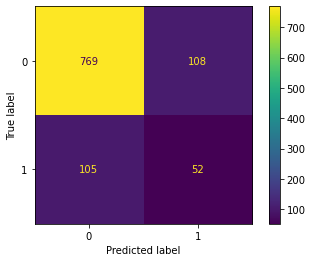

In [33]:
rf_model = gs_forest_tune2.best_estimator_
plot_confusion_matrix(rf_model, X_test, y_test);

In [34]:
#rf = RandomForestClassifier(n_estimators = 150, max_depth = 5, min_samples_split = 3)
#rf.fit(X_train, y_train)
#rf_predict = rf.predict(X_test)

#rf_tree = rf.predict(X_train)

In [35]:
#print(classification_report(y_train, rf_tree))

In [36]:
#print(classification_report(y_test, rf_predict))